# Ejercicio - Busqueda de Alojamiento en Airbnb.

Supongamos que somos un agente de [Airbnb](http://www.airbnb.com) localizado en Lisboa, y tenemos que atender peticiones de varios clientes. Tenemos un archivo llamado `airbnb.csv` (en la carpeta data) donde tenemos información de todos los alojamientos de Airbnb en Lisboa.

In [1]:
import pandas as pd
df_airbnb = pd.read_csv("./src/pandas/airbnb.csv")

In [2]:
df_airbnb.head()

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
0,6499,14455,Entire home/apt,Belém,8,5.0,2,1.0,57.0
1,17031,66015,Entire home/apt,Alvalade,0,0.0,2,1.0,46.0
2,25659,107347,Entire home/apt,Santa Maria Maior,63,5.0,3,1.0,69.0
3,29248,125768,Entire home/apt,Santa Maria Maior,225,4.5,4,1.0,58.0
4,29396,126415,Entire home/apt,Santa Maria Maior,132,5.0,4,1.0,67.0


In [3]:
df_airbnb.dtypes

room_id                   int64
host_id                   int64
room_type                object
neighborhood             object
reviews                   int64
overall_satisfaction    float64
accommodates              int64
bedrooms                float64
price                   float64
dtype: object

En concreto el dataset tiene las siguientes variables:
- room_id: el identificador de la propiedad
- host_id: el identificador del dueño de la propiedad
- room_type: tipo de propiedad (vivienda completa/(habitacion para compartir/habitación privada)
- neighborhood: el barrio de Lisboa
- reviews: El numero de opiniones
- overall_satisfaction: Puntuacion media del apartamento
- accommodates: El numero de personas que se pueden alojar en la propiedad
- bedrooms: El número de habitaciones
- price: El precio (en euros) por noche

## Usando Pandas

### Caso 1.

Alicia va a ir a Lisboa durante una semana con su marido y sus 2 hijos. Están buscando un apartamento con habitaciones separadas para los padres y los hijos. No les importa donde alojarse o el precio, simplemente quieren tener una experiencia agradable. Esto significa que solo aceptan lugares con más de 10 críticas con una puntuación mayor de 4. Cuando seleccionemos habitaciones para Alicia, tenemos que asegurarnos de ordenar las habitaciones de mejor a peor puntuación. Para aquellas habitaciones que tienen la misma puntuación, debemos mostrar antes aquellas con más críticas. Debemos darle 3 alternativas.

In [7]:

# filtro
df=df_airbnb
condicion=(df.reviews>10) & (df.overall_satisfaction>4) & (df.bedrooms==2) & (df.accommodates==4)

# ordeno
df[condicion]=df[condicion].sort_values(by='overall_satisfaction',ascending=[False])
df_alicia=df[condicion]
# muestro top 3
df_alicia.head(3)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
38,88312,482911,Entire home/apt,Santo António,37,5.0,4,2.0,75.0
40,89015,485573,Entire home/apt,Misericórdia,11,5.0,4,2.0,115.0
43,90931,184400,Entire home/apt,Santo António,14,4.5,4,2.0,104.0


### Caso 2

Roberto es un casero que tiene una casa en Airbnb. De vez en cuando nos llama preguntando sobre cuales son las críticas de su alojamiento. Hoy está particularmente enfadado, ya que su hermana Clara ha puesto una casa en Airbnb y Roberto quiere asegurarse de que su casa tiene más críticas que las de Clara. Tenemos que crear un dataframe con las propiedades de ambos. Las id de las casas de Roberto y Clara son 97503 y 90387  respectivamente. Finalmente guardamos este dataframe como excel llamado "roberto.xls

In [17]:

df=df_airbnb
condicion =(df.room_id==97503) | (df.room_id==90387) 
cols=['room_id','reviews']
df_filter=df[condicion]
df_roberto=df_filter[cols]
df_roberto.to_excel('./src/pandas/roberto.xls',index=False)
            

C:\Users\DELL\AppData\Local\Temp\ipykernel_11336\4275060018.py:6: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_roberto.to_excel('./src/pandas/roberto.xls',index=False)



### Caso 3

Diana va a Lisboa a pasar 3 noches y quiere conocer a gente nueva. Tiene un presupuesto de 50€ para su alojamiento. Debemos buscarle las 10 propiedades más baratas, dandole preferencia a aquellas que sean habitaciones compartidas *(room_type == Shared room)*, y para aquellas viviendas compartidas debemos elegir aquellas con mejor puntuación.

In [21]:
df=df_airbnb
condicion=(df.room_type=='Shared room') & (df.price*3<50)
df_restriccion=df[condicion]
#Ordenando
df_restriccion=df_restriccion.sort_values(by=['price','overall_satisfaction'],ascending=[True,False])
df_restriccion.head(10)

,room_id,host_id,room_type,neighborhood,reviews,overall_satisfaction,accommodates,bedrooms,price
1010,1179457,5799522,Shared room,Santo António,42,4.0,16,1.0,10.0
3562,5557699,28812904,Shared room,Santa Maria Maior,22,4.0,1,1.0,10.0
7584,13116032,72951043,Shared room,Arroios,1,0.0,8,1.0,10.0
13148,19314160,135270245,Shared room,Santa Clara,0,0.0,1,1.0,10.0
9065,14933182,91501272,Shared room,Santo António,5,5.0,8,1.0,11.0
4353,6728244,28812904,Shared room,Santa Maria Maior,8,4.5,1,1.0,11.0
5616,9317561,48360716,Shared room,Arroios,13,4.5,4,1.0,11.0
6640,11693356,28812904,Shared room,Santa Maria Maior,3,4.5,1,1.0,11.0
6641,11693442,28812904,Shared room,Santa Maria Maior,16,4.5,1,1.0,11.0
8908,14708916,91501272,Shared room,Santo António,18,4.5,4,1.0,11.0


## Usando MatPlot

In [29]:

import matplotlib.pyplot as plot

In [30]:
%matplotlib inline

### Caso 1.

Realizar un gráfico circular, de la cantidad de tipo de habitaciones `room_type`  

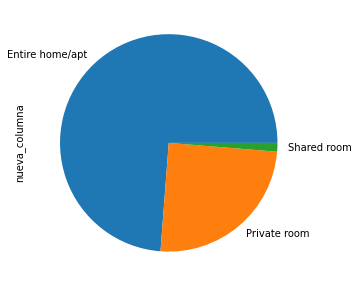

In [31]:
df=df_airbnb
df['nueva_columna']=1
df_circular=df.groupby('room_type')['nueva_columna'].sum()
grafica=df_circular.plot.pie(y='mass',figsize=(5,5))